Load Data

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load data from JSON files
def load_data(file_name):
    with open(file_name, 'r') as file:
        data = json.load(file)
    
    if 'train_losses' in data:
        del data['train_losses'][1]
    if 'val_losses' in data:
        del data['val_losses'][1]
    if 'test_errors' in data:
        del data['test_errors'][1]
    
    return data

adam_data = load_data('./Adam.json')
sgd_data = load_data('./SGD.json')
swats_data = load_data('./SWATS.json')

num_runs = 4

Training Loss Plots

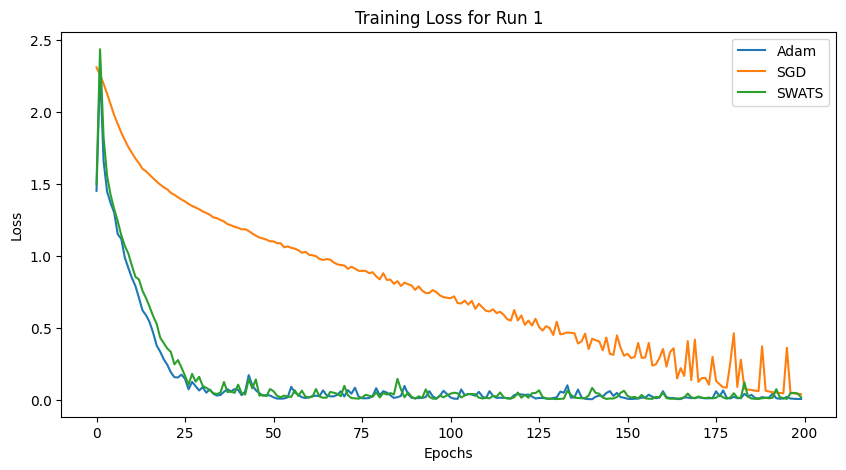

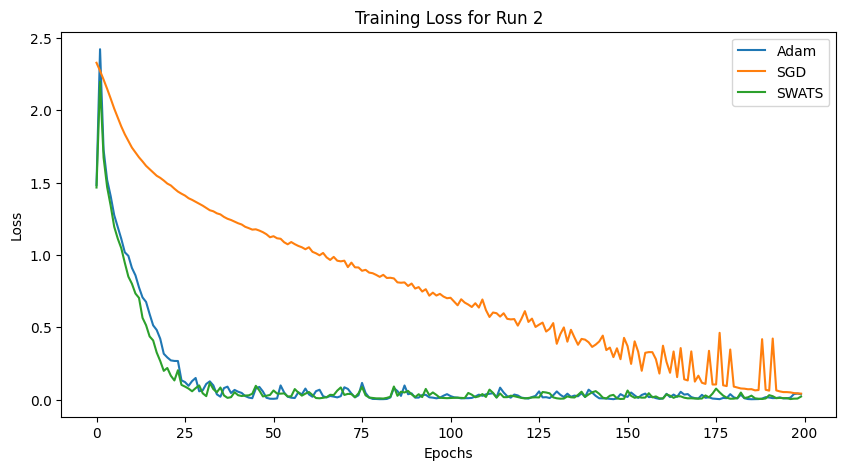

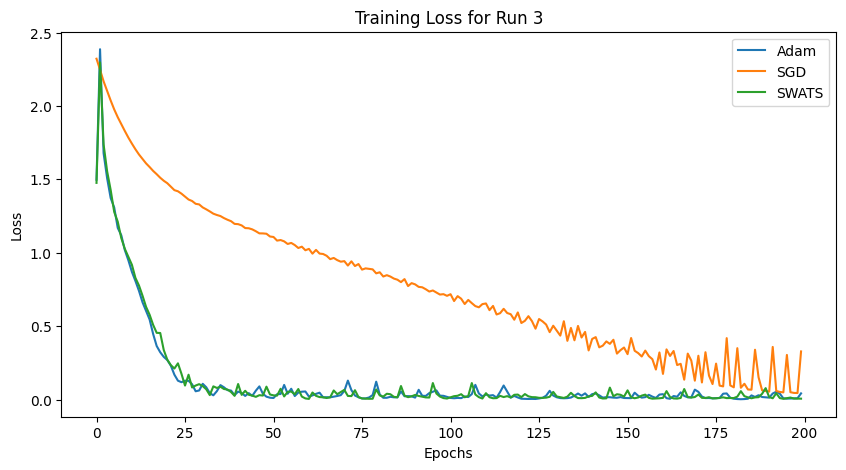

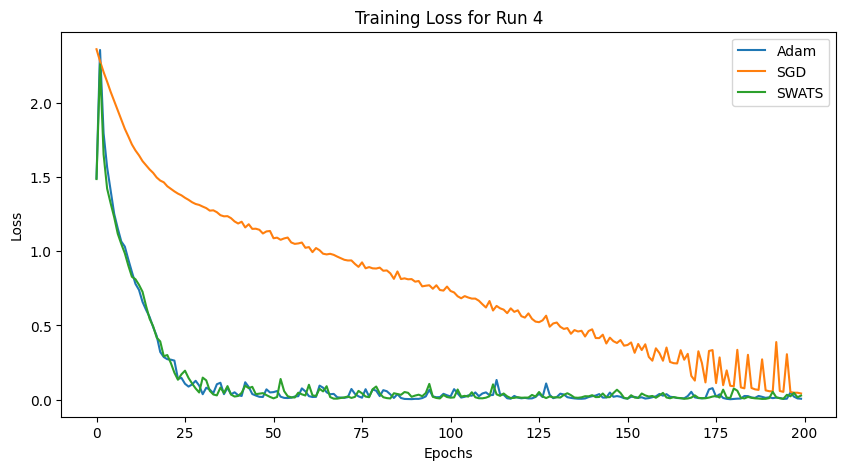

In [4]:
# Plot 1: Training Loss Plot for each run
for run in range(num_runs):
    plt.figure(figsize=(10, 5))
    plt.plot(adam_data['train_losses'][run], label='Adam')
    plt.plot(sgd_data['train_losses'][run], label='SGD')
    plt.plot(swats_data['train_losses'][run], label='SWATS')
    plt.title(f'Training Loss for Run {run+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Test Error Plots

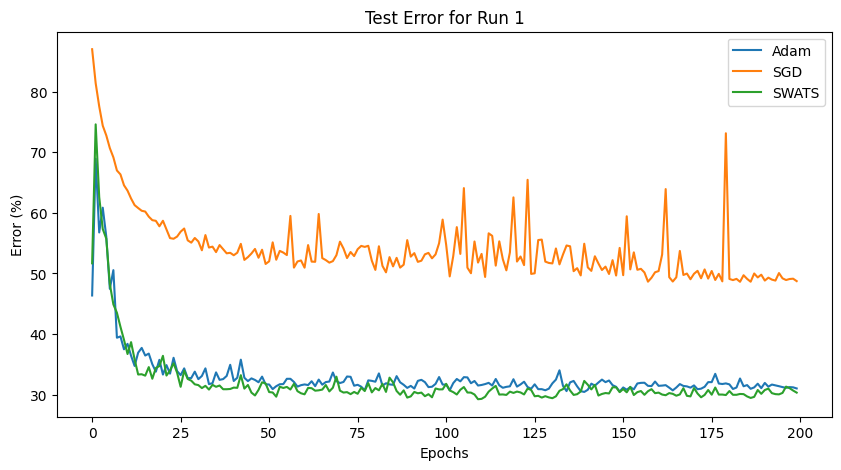

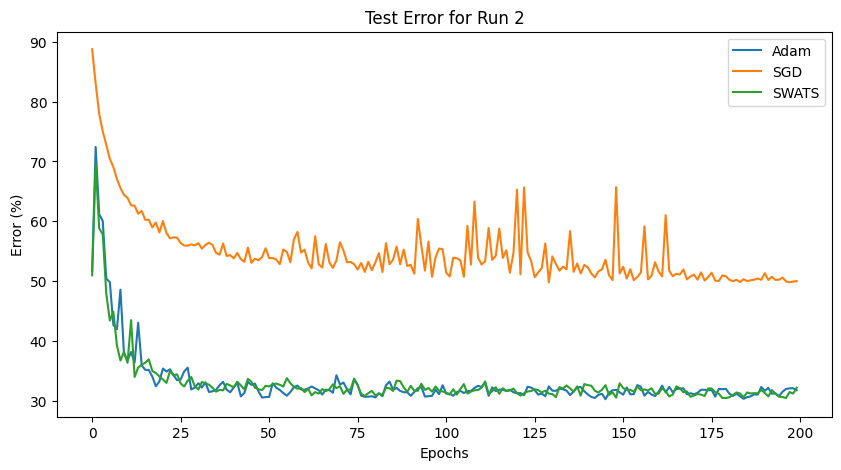

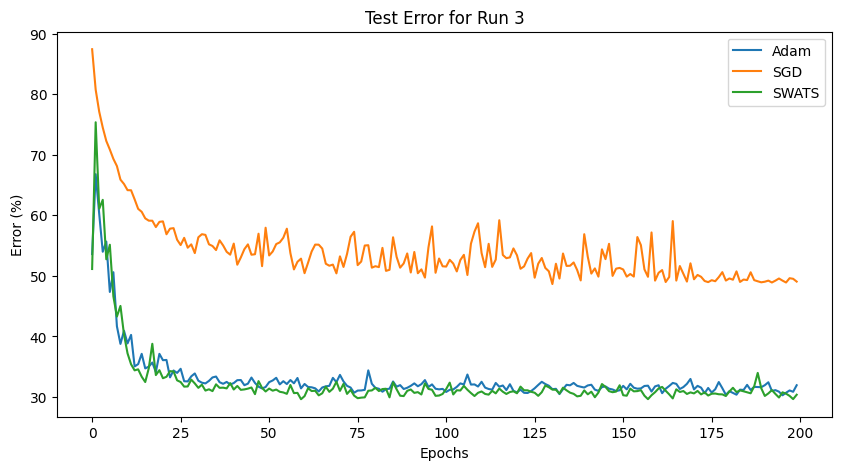

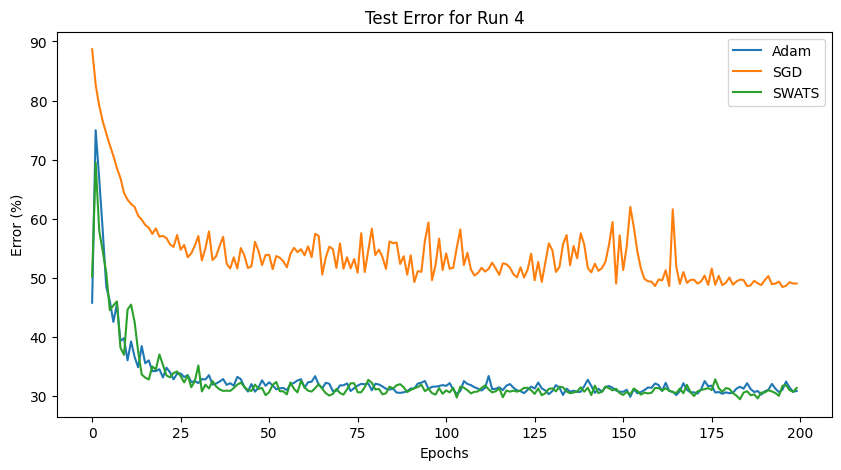

In [5]:
# Plot 2: Test Error Plot for each run
for run in range(num_runs):
    plt.figure(figsize=(10, 5))
    plt.plot(adam_data['test_errors'][run], label='Adam')
    plt.plot(sgd_data['test_errors'][run], label='SGD')
    plt.plot(swats_data['test_errors'][run], label='SWATS')
    plt.title(f'Test Error for Run {run+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.show()

Mean Test Error Plot

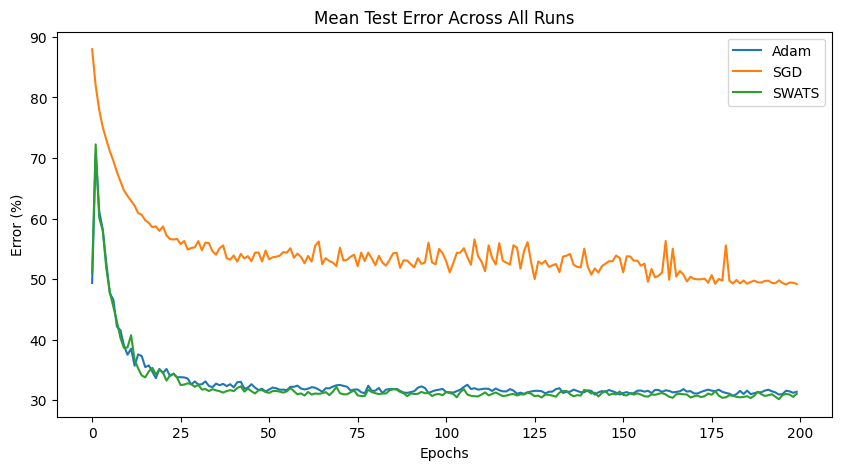

In [6]:
# Function to calculate mean test error
def calculate_mean_test_error(data):
    return np.mean(data['test_errors'], axis=0)

# Calculate mean test error for each optimizer
mean_test_error_adam = calculate_mean_test_error(adam_data)
mean_test_error_sgd = calculate_mean_test_error(sgd_data)
mean_test_error_swats = calculate_mean_test_error(swats_data)

# Plot 3: Mean Test Error Plot
plt.figure(figsize=(10, 5))
plt.plot(mean_test_error_adam, label='Adam')
plt.plot(mean_test_error_sgd, label='SGD')
plt.plot(mean_test_error_swats, label='SWATS')
plt.title('Mean Test Error Across All Runs')
plt.xlabel('Epochs')
plt.ylabel('Error (%)')
plt.legend()
plt.show()

## Final Plots

Training Loss

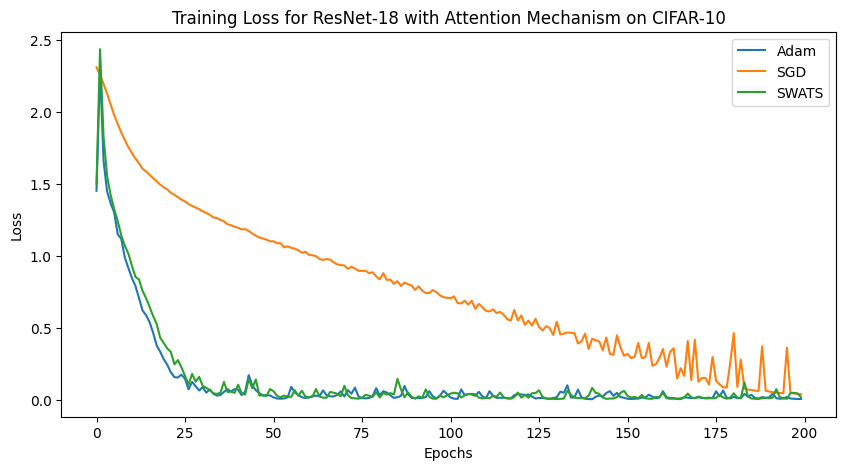

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(adam_data['train_losses'][0], label='Adam')
plt.plot(sgd_data['train_losses'][0], label='SGD')
plt.plot(swats_data['train_losses'][0], label='SWATS')
plt.title(f'Training Loss for ResNet-18 with Attention Mechanism on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Error

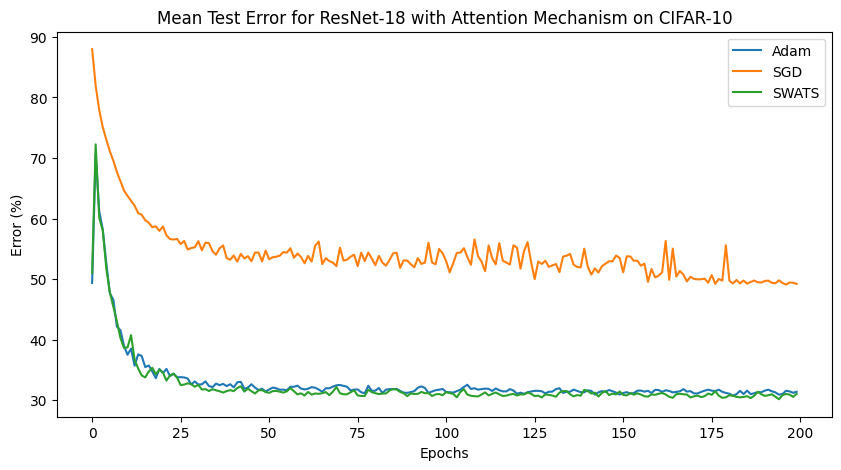

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(mean_test_error_adam, label='Adam')
plt.plot(mean_test_error_sgd, label='SGD')
plt.plot(mean_test_error_swats, label='SWATS')
plt.title('Mean Test Error for ResNet-18 with Attention Mechanism on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Error (%)')
plt.legend()
plt.show()